In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv(r"D:\uni\Teaching Assistant\Statistical Quality Control\1400-2\Assignments\Assignment 4 - QC Charts\Uploading Time.csv").set_index('day')
df

,1,2,3,4,5
day,,,,,
1,13.235,14.128,16.744,14.573,16.914
2,14.314,14.592,16.075,14.666,16.109
3,14.284,14.871,14.932,14.324,15.674
4,15.604,16.352,13.841,12.831,15.507
5,13.285,14.340,17.056,19.378,18.391
6,15.955,15.451,13.574,13.281,14.198
7,16.274,15.064,18.366,14.177,15.144
8,14.190,14.303,16.637,16.067,15.519
9,13.884,17.277,15.355,16.176,13.688


In [2]:
df['Xbar']=np.mean(df , axis=1)
df

,1,2,3,4,5,Xbar
day,,,,,,
1,13.235,14.128,16.744,14.573,16.914,15.1188
2,14.314,14.592,16.075,14.666,16.109,15.1512
3,14.284,14.871,14.932,14.324,15.674,14.8170
4,15.604,16.352,13.841,12.831,15.507,14.8270
5,13.285,14.340,17.056,19.378,18.391,16.4900
6,15.955,15.451,13.574,13.281,14.198,14.4918
7,16.274,15.064,18.366,14.177,15.144,15.8050
8,14.190,14.303,16.637,16.067,15.519,15.3432
9,13.884,17.277,15.355,16.176,13.688,15.2760


day 5 should be deleted due to the disorder in wifi connection

In [3]:
df1=df.drop(5)
df1

,1,2,3,4,5,Xbar
day,,,,,,
1,13.235,14.128,16.744,14.573,16.914,15.1188
2,14.314,14.592,16.075,14.666,16.109,15.1512
3,14.284,14.871,14.932,14.324,15.674,14.8170
4,15.604,16.352,13.841,12.831,15.507,14.8270
6,15.955,15.451,13.574,13.281,14.198,14.4918
7,16.274,15.064,18.366,14.177,15.144,15.8050
8,14.190,14.303,16.637,16.067,15.519,15.3432
9,13.884,17.277,15.355,16.176,13.688,15.2760
10,14.039,16.697,15.089,14.627,15.220,15.1344


In [4]:
df['S']=np.std(df[[str(x) for x in range(1,6)]] , axis=1)
df1['Xbar']=np.mean(df1 , axis=1)
df1['S']=np.std(df1[[str(x) for x in range(1,6)]] , axis=1)
df1

,1,2,3,4,5,Xbar,S
day,,,,,,,
1,13.235,14.128,16.744,14.573,16.914,15.1188,1.462348
2,14.314,14.592,16.075,14.666,16.109,15.1512,0.777151
3,14.284,14.871,14.932,14.324,15.674,14.8170,0.505515
4,15.604,16.352,13.841,12.831,15.507,14.8270,1.292127
6,15.955,15.451,13.574,13.281,14.198,14.4918,1.044579
7,16.274,15.064,18.366,14.177,15.144,15.8050,1.443265
8,14.190,14.303,16.637,16.067,15.519,15.3432,0.963390
9,13.884,17.277,15.355,16.176,13.688,15.2760,1.362325
10,14.039,16.697,15.089,14.627,15.220,15.1344,0.884134


# Q1

<IPython.core.display.Javascript object>


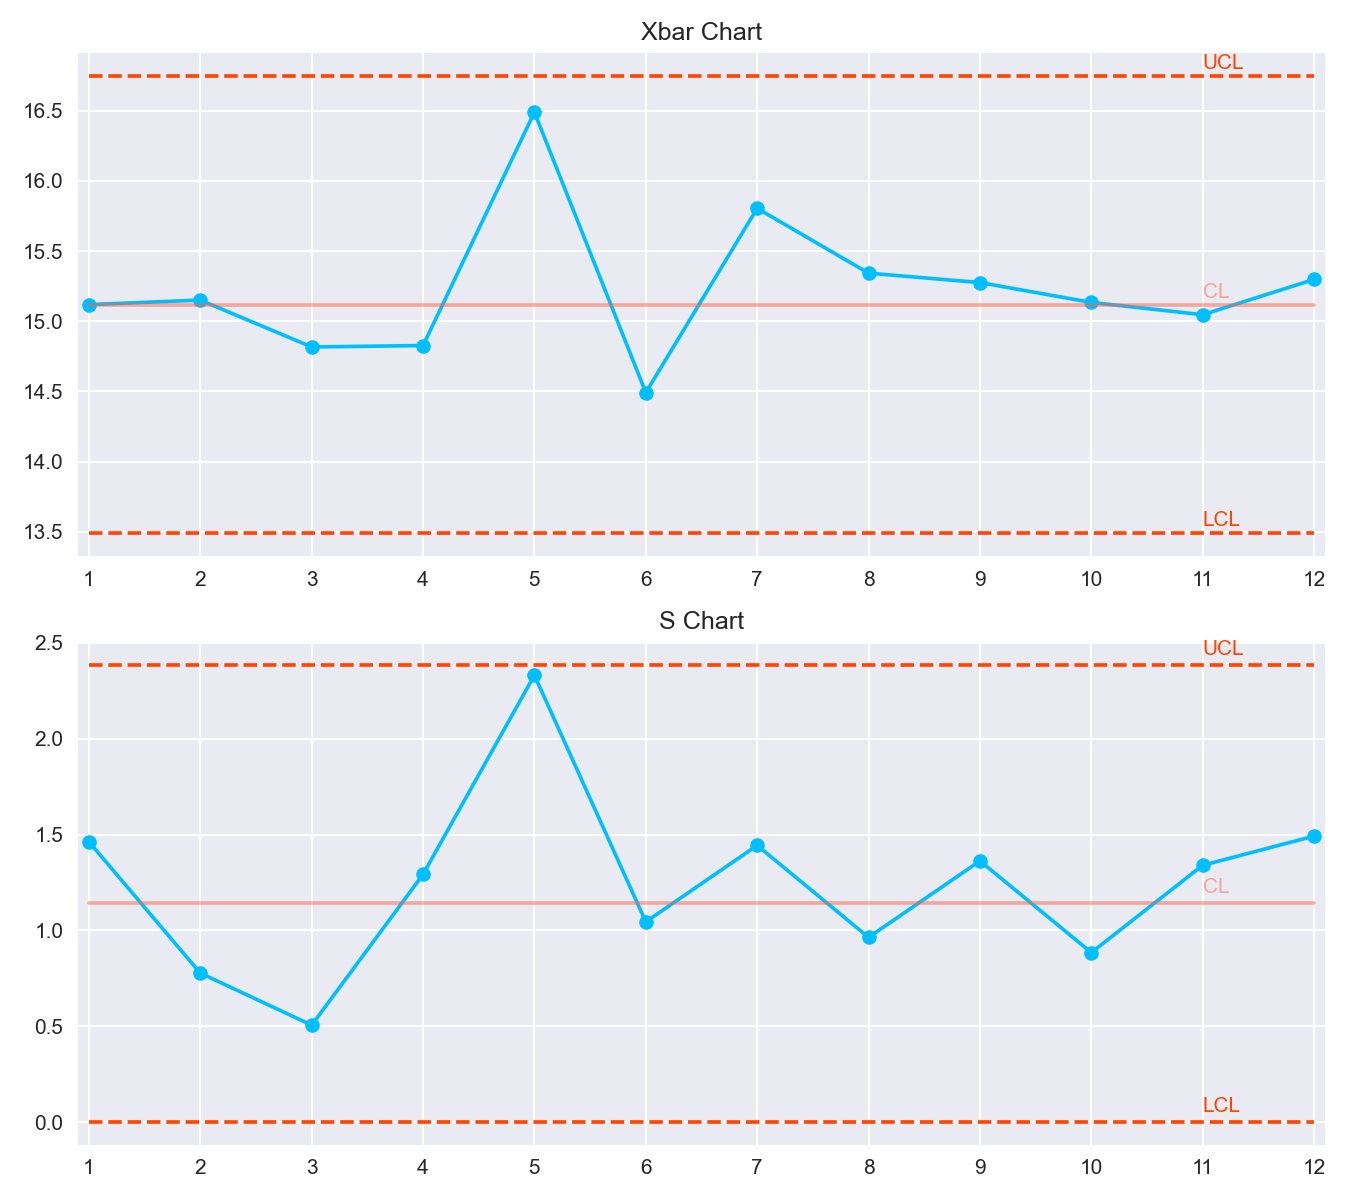

In [5]:
%matplotlib notebook
#Xbar and S calculation
CL_Xbar=np.mean(df1['Xbar'])
CL_S= np.mean(df1['S'])

A3=1.427
B4=2.089
B3=0
UCL_Xbar=CL_Xbar+A3*CL_S
LCL_Xbar=CL_Xbar-A3*CL_S

UCL_S=B4*CL_S
LCL_S=B3*CL_S

#Xbar Chart
plt.figure(figsize=(9,8))
plt.style.use('seaborn')
plt.subplot(2,1,1)
plt.plot(np.arange(1,13) , df['Xbar'] , marker='o' , c='deepskyblue' , label='data') #data
plt.plot([1,12] , [UCL_Xbar , UCL_Xbar] , ls='--' , c='orangered' , label='UCL') #UCL
plt.plot([1,12] , [LCL_Xbar , LCL_Xbar] , ls='--' , c='orangered' , label='LCL') #LCL
plt.plot([1,12] , [CL_Xbar , CL_Xbar] , c='tomato' , label='CL' , alpha=0.5) #CL
plt.xlim([0.9,12.1])
plt.text(11,UCL_Xbar+0.05,s='UCL' , color='orangered')
plt.text(11,CL_Xbar+0.05,s='CL' , color='tomato' , alpha=0.5)
plt.text(11,LCL_Xbar+0.05,s='LCL' , color='orangered')
# plt.legend(loc='upper right')
plt.title('Xbar Chart')
plt.xticks(range(1,len(df)+1))


#S Chart
plt.subplot(2,1,2)
plt.plot(np.arange(1,13) , df['S'] , marker='o' , c='deepskyblue' , label='data') #data
plt.plot([1,12] , [UCL_S , UCL_S] , ls='--' , c='orangered' , label='UCL') #UCL
plt.plot([1,12] , [LCL_S , LCL_S] , ls='--' , c='orangered' , label='LCL') #LCL
plt.plot([1,12] , [CL_S, CL_S] , c='tomato' , label='CL' , alpha=0.5) #CL
plt.xlim([0.9,12.1])
plt.text(11,UCL_S+0.05,s='UCL' , color='orangered')
plt.text(11,CL_S+0.05,s='CL' , color='tomato' , alpha=0.5)
plt.text(11,LCL_S+0.05,s='LCL' , color='orangered')
plt.title('S Chart')
plt.xticks(range(1,len(df)+1))

plt.tight_layout()
plt.show()

# Q2

<IPython.core.display.Javascript object>


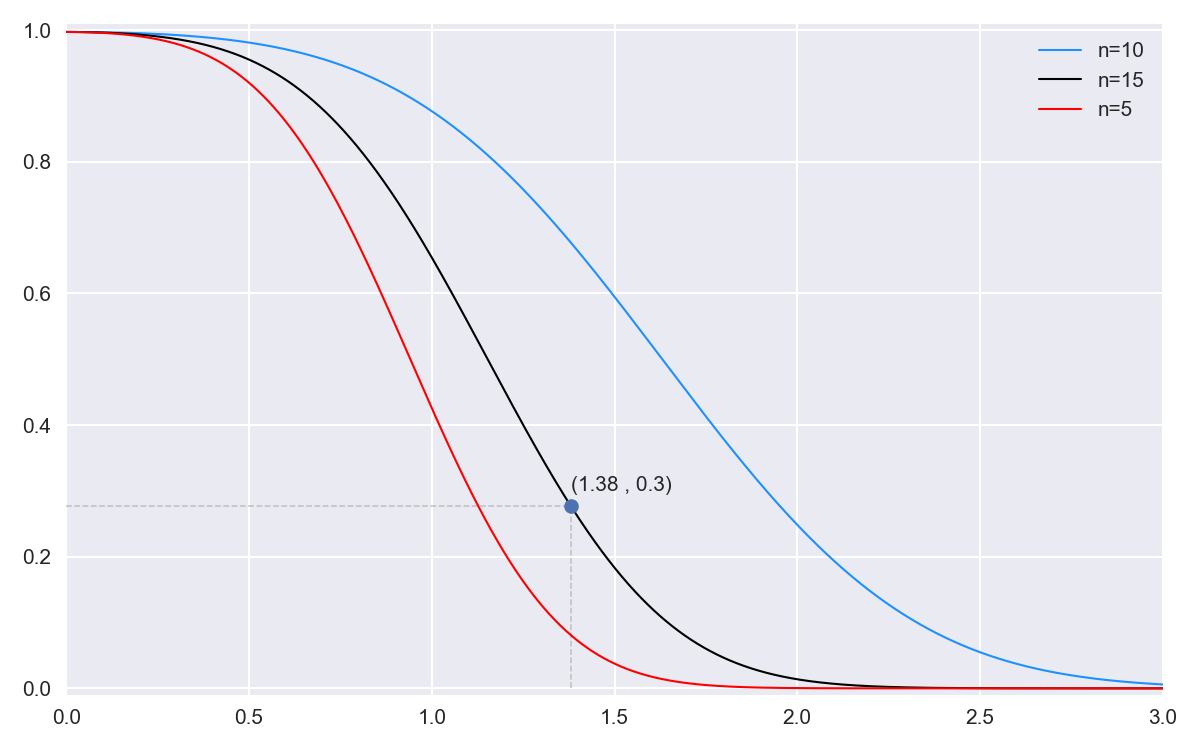

In [37]:
from scipy.stats import norm
sigma=CL_S/0.94
n=np.ceil(((3+norm.ppf(0.7))**2)*(sigma**2)/(16.5-CL_Xbar)**2)
x_axis=np.linspace(0,3,3001)
y_axis10= norm.cdf(3-((x_axis)/sigma)*(n**0.5) )-norm.cdf(-3-((x_axis)/sigma)*(n**0.5) )
y_axis15= norm.cdf( 3-((x_axis)/sigma)*((n+5)**0.5) )-norm.cdf( -3-((x_axis)/sigma)*((n+5)**0.5))
y_axis5= norm.cdf( 3-((x_axis)/sigma)*((n-5)**0.5) )-norm.cdf( -3-((x_axis)/sigma)*((n-5)**0.5) )

plt.figure(figsize=(8,5))
plt.plot(x_axis,y_axis5 , label='n=10' , color='dodgerblue' , linewidth=1)
plt.plot(x_axis,y_axis10 , label='n=15' , color='k', linewidth=1)
plt.plot(x_axis,y_axis15 , label='n=5' , color='r', linewidth=1)
plt.plot(x_axis[1380] , y_axis10[1380], marker="o", markeredgecolor="k")
plt.xlim([0,3])
plt.ylim([-0.01,1.01])
plt.text(16.5-CL_Xbar , 0.3 , s='({:.2f} , {})'.format(16.5-CL_Xbar , 0.3))


#Bonus
plt.hlines(y_axis10[1380] ,0,x_axis[1380] , colors='silver' ,ls='--',linewidth=0.75)
plt.vlines(x_axis[1380] ,0 ,y_axis10[1380] ,colors='silver',ls='--',linewidth=0.75)

plt.legend()
plt.tight_layout()
plt.show()